In [1]:
# IMPORT MODULES

%matplotlib inline

import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import calendar

import sklearn.preprocessing as pp
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as rms
from sklearn.metrics import mean_absolute_error as mae

import pandas as pd

In [3]:
# READ DATA
data = pd.read_excel("DonneesMeteo - 1an.xls", sep=" ", header=1)
data["Date"] = pd.to_datetime(data["Date"], format="%Y%m%d")

hh = pd.DatetimeIndex(pd.to_datetime(data['hh(UTC)']*3600*1000000000))
data['HOUR'] = hh.hour
data['MINUTE'] = hh.minute

In [4]:
dataset = np.array(data[["IrrPOA(W/m2)", "P1(W)"]]).astype(np.float)

#Remove nan and infinite values
masknan = ~np.any(np.isnan(dataset), axis=1)
dataset = dataset[masknan]
maskfin = np.any(np.isfinite(dataset), axis=1)
dataset = dataset[maskfin]
X=dataset[:,0:1]
y=dataset[:,1]

#SCALE INDEPENDENT DATA
scaler = pp.StandardScaler()
X[:,0]=scaler.fit_transform(X[:,0])

#LABEL BINARIZER
lbhour = pp.LabelBinarizer()
lbhour.fit(list(range(24)))
pp.LabelBinarizer(neg_label=0, pos_label=1)
lbhour.classes_
Hour=lbhour.transform(data["HOUR"])

lbmin = pp.LabelBinarizer()
lbmin.fit(list(range(60)))
pp.LabelBinarizer(neg_label=0, pos_label=1)
lbmin.classes_
Minute = lbmin.transform(data["MINUTE"])

Irr = np.reshape(X[:,0],(len(X),1))

X=np.concatenate((Irr,Hour,Minute),axis=1)

#X col 1 is irr, col 2-25 hours, col 26-86 min

In [7]:
X_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_training, X_CV, y_training, y_CV = train_test_split(X_full, y_full, test_size=0.5, random_state=0)

bestgamma = 0.2
bestC = 6

C = 1
C = 2
C = 4
C = 6
C = 8
C = 10
C = 12
C = 14
C = 16
C = 18
C = 20


{'C': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
 'r2CCV': [0.9602426662052943,
  0.96054212992172416,
  0.96072214239769127,
  0.96076552801113191,
  0.96075294911270859,
  0.96075498258872238,
  0.96075321104708344,
  0.96073764282085516,
  0.96072335640865814,
  0.96071325898817195,
  0.96071040335365787],
 'rmsCCV': [99.986955566505586,
  99.233824950074862,
  98.781105974278219,
  98.671994145358383,
  98.703629208318688,
  98.698515156232489,
  98.702970461411041,
  98.742123477862549,
  98.778052820331297,
  98.803447137231217,
  98.810628861306526]}

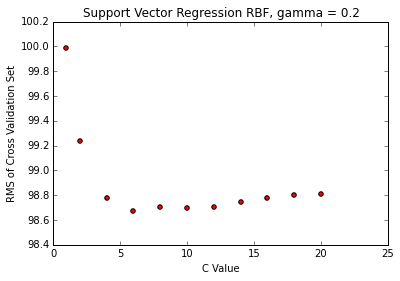

In [6]:
#RUNNING THROUGH VARIOUS PARAMETERS WITH CV SET
visualize= {}
visualize["C"]=[1,2,4,6,8,10,12,14,16,18,20]
visualize["r2CCV"] = []
visualize["rmsCCV"] = []

for Ci in visualize["C"]:
    print("C = "+str(Ci))
    clf = SVR(C=Ci, kernel='rbf', gamma= bestgamma);
    clf.fit(X_training, y_training)
    
    y_true, y_pred = y_CV, clf.predict(X_CV)
    visualize["r2CCV"].append(r2_score(y_true, y_pred))
    visualize["rmsCCV"].append(rms(y_true, y_pred))

plt.scatter(visualize["C"], visualize["rmsCCV"], c='r')
plt.xlabel('C Value')
plt.ylabel('RMS of Cross Validation Set')
plt.title('Support Vector Regression RBF, gamma = '+str(bestgamma))

visualize

Gamma = 0.1
Gamma = 0.12
Gamma = 0.14
Gamma = 0.16
Gamma = 0.18
Gamma = 0.2
Gamma = 0.22
Gamma = 0.24
Gamma = 0.26
Gamma = 0.28


{'Gamma': [0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28],
 'r2GCV': [0.96085366573472319,
  0.96084600808641119,
  0.96082183581628922,
  0.96079576573991488,
  0.96077964844597796,
  0.96076552801113191,
  0.96075577119400812,
  0.96073983886912762,
  0.96072344342894955,
  0.96070836032980367],
 'rmsGCV': [98.45033384243267,
  98.469592300393359,
  98.530383894495571,
  98.595948340580122,
  98.636482224493307,
  98.671994145358383,
  98.696531868266689,
  98.736600567745583,
  98.777833970293031,
  98.81576692555349]}

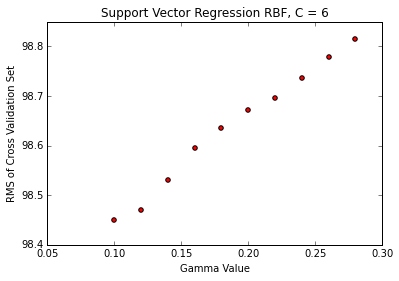

In [8]:
visualize2= {}
visualize2["Gamma"]=[0.1,0.12,0.14,0.16,0.18, 0.2, 0.22, 0.24, 0.26, 0.28]
visualize2["r2GCV"]=[]
visualize2["rmsGCV"]=[]

for Gammai in visualize2["Gamma"]:
    print("Gamma = "+str(Gammai))
    clf = SVR(C=bestC, kernel='rbf', gamma= Gammai);
    clf.fit(X_training, y_training)
    
    y_true, y_pred = y_CV, clf.predict(X_CV)
    visualize2["r2GCV"].append(r2_score(y_true, y_pred))
    visualize2["rmsGCV"].append(rms(y_true, y_pred))

plt.scatter(visualize2["Gamma"], visualize2["rmsGCV"], c='r')
plt.xlabel('Gamma Value')
plt.ylabel('RMS of Cross Validation Set')
plt.title('Support Vector Regression RBF, C = '+str(bestC))
visualize2

In [7]:
#CLF, C=80
clffinal = SVR(C=bestC, kernel='rbf', gamma= bestgamma);
clffinal.fit(X_training, y_training)

y_true, y_pred1 = y_test, clffinal.predict(X_test)

R2 Score, C=26, Gamma= 0.2:
0.963460197907
RMS, C=26, Gamma= 0.2:
184.926508093


R2 Score, C=26, Gamma= 0.2:
0.963460197907
RMS, C=26, Gamma= 0.2:
184.926508093
sqrt of RMS, C=26, Gamma= 0.2:
13.5987686241


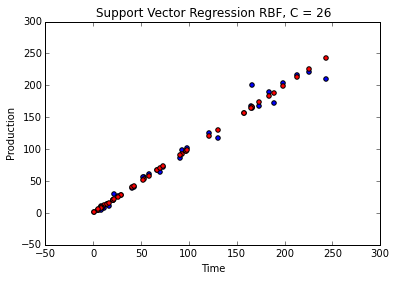

In [25]:
print("R2 Score, C="+str(bestC)+", Gamma= "+str(bestgamma))
print(r2_score(y_true, y_pred1))
print("RMS, C="+str(bestC)+", Gamma= "+str(bestgamma))
print(rms(y_true, y_pred1))
print("sqrt of RMS, C="+str(bestC)+", Gamma= "+str(bestgamma))
print(np.sqrt(rms(y_true,y_pred1)));
print("MAE, C="+str(bestC)+", Gamma= "+str(bestgamma))
print(mae(y_true, y_pred1))

X_graph = list(range(0,len(y_true)))
plt.scatter(y_true[0:40], y_pred1[0:40], c='b')
plt.scatter(y_true[0:40], y_true[0:40], c='r')
#plt.scatter(X_graph, y_pred1, c='b')
plt.xlabel('Time')
plt.ylabel('Production')
plt.title('Support Vector Regression RBF, C = '+str(bestC))

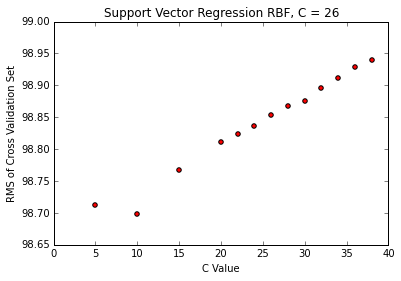

In [19]:
visualize3 = {'C': [5, 10, 15, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38],
 'r2CCV': [0.96074931894747406, 
           0.96075498258872238, 
           0.96072778869012354, 
           0.96071040335365787, 
           0.96070511258101254,
           0.96070007471059427,
           0.96069304577230552,
           0.9606880075382731,
           0.96068430344058942,
           0.96067639549762784,
           0.96066997651607899,
           0.96066320347074807,
           0.96065908659922117],
 'rmsCCV': [98.712758823797415, 
            98.698515156232489, 
            98.766905937790384, 
            98.810628861306526, 
            98.823934790022221,
            98.836604687059619,
            98.854281982624329,
            98.866952794126348,
            98.876268344621437,
            98.896156276382598,
            98.912299572767182,
            98.929333315171959,
            98.939686963445993]}

plt.scatter(visualize3["C"], visualize3["rmsCCV"], c='r')
plt.xlabel('C Value')
plt.ylabel('RMS of Cross Validation Set')
plt.title('Support Vector Regression RBF, C = '+str(bestC))